### **ÏïÑÎßàÏ°¥ Î∑∞Ìã∞ Ï†úÌíà ÌèâÏ†ê**

 - 2M Í∞ú Ïù¥ÏÉÅÏùò Í≥†Í∞ù Î¶¨Î∑∞ÏôÄ ÌèâÏ†ê Ï†ïÎ≥¥Î•º Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∞ÄÏßÄÍ≥† Ïù∏Í∏∞ Ï†úÌíà Ï∂îÏ≤úÍ≥º ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Ïûê. ÏïûÏÑú ÏòÅÌôî Ï∂îÏ≤úÍ≥º ÎπÑÏä∑ÌïòÍ≤å ÏßÑÌñâÍ∞ÄÎä•ÌïòÎã§.

 - Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Ï¥ù 4Í∞ÄÏßÄ Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎã§:

   - ÏÇ¨Ïö©Ïûê ID
   - ÏÉÅÌíà ID (ASINÏù¥Îùº Î∂ÄÎ•∏Îã§)
   - ÌèâÏ†ê Ï†ïÎ≥¥ (1-5)
   - ÌèâÏ†êÏù¥ Ï£ºÏñ¥ÏßÑ ÏãúÍ∞Ñ

* ÏïûÏÑú 2ÏùºÏ∞®ÏôÄ 4ÏùºÏ∞® Í∞ïÏùò ÎÇ¥Ïö©ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ïù∏Í∏∞ÎèÑ Í∏∞Î∞òÏùò Ï∂îÏ≤úÍ≥º SVD Í∏∞Î∞òÏùò Ï∂îÏ≤úÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Ïûê!

--------
--------


### **0. Îç∞Ïù¥ÌÑ∞ÏôÄ ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# !wget "https://grepp-reco-test.s3.ap-northeast-2.amazonaws.com/ratings_Beauty.csv"
amazon_ratings = pd.read_csv("https://grepp-reco-test.s3.ap-northeast-2.amazonaws.com/ratings_Beauty.csv")

#### **0-1. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏**


In [2]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [3]:
amazon_ratings.shape

(2023070, 4)

In [4]:
amazon_ratings.isna().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

\4Í∞ÄÏßÄ Ï†ïÎ≥¥ Ï§ëÏóê ÌïòÎÇòÎùºÎèÑ ÎπÑÏñ¥ÏûàÎäî Î†àÏΩîÎìúÎì§ÏùÑ Î™®Îëê ÎÇ†Î¶¨Í≥† Ï≤òÏùå 5Í∞úÏùò Î†àÏΩîÎìúÎ•º ÏÇ¥Ìé¥Î≥∏Îã§

In [5]:
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200

Î™áÍ∞úÏùò Î†àÏΩîÎìúÏôÄ Î™áÍ∞úÏùò Ïª¨ÎüºÏù¥ ÏûàÎäîÏßÄ ÏÇ¥Ìé¥Î≥∏Îã§

In [6]:
amazon_ratings.shape

(2023070, 4)

In [37]:
amazon_ratings.describe()

Rating     Timestamp
count  2.023070e+06  2.023070e+06
mean   4.149036e+00  1.360389e+09
std    1.311505e+00  4.611860e+07
min    1.000000e+00  9.087552e+08
25%    4.000000e+00  1.350259e+09
50%    5.000000e+00  1.372810e+09
75%    5.000000e+00  1.391472e+09
max    5.000000e+00  1.406074e+09

In [8]:
rate_count= pd.DataFrame(amazon_ratings.groupby('Rating')['ProductId'].count())
rate_count.rename(columns={'ProductId':'count'}, inplace= True)
rate_count

count
Rating         
1.0      183784
2.0      113034
3.0      169791
4.0      307740
5.0     1248721

Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏

<Figure size 1170x827 with 0 Axes>

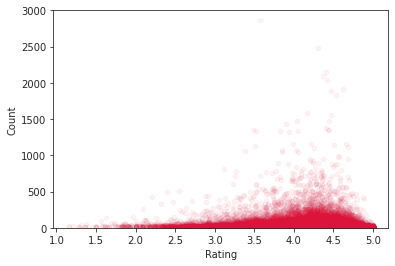

In [45]:
# Rating versus count

product_rating = amazon_ratings.groupby('ProductId')['Rating'].mean()
product_rating_count = amazon_ratings.groupby('ProductId')['Rating'].count()
unreliability = amazon_ratings.groupby('ProductId')['Rating'].std(ddof = -1)
unique_products_list = amazon_ratings.ProductId.unique()

data_model = pd.DataFrame({'Rating': product_rating[unique_products_list],\
                           'Count': product_rating_count[unique_products_list], \
                          'Unreliability': unreliability[unique_products_list]})
data_model= data_model[data_model.Count > 10]

sns.set_style('ticks')
plt.figure(num=None, figsize=(11.7, 8.27), dpi=100, facecolor='w', edgecolor='k')

ax = data_model.plot(kind='scatter', x='Rating', y='Count', color='crimson', alpha=0.05)

plt.ylim([0,3000])
plt.show()

-------
### **1. Î©îÎ™®Î¶¨ Î≤†Ïù¥Ïä§ Ï∂îÏ≤ú ÏãúÏä§ÌÖú**


#### **1.1 Ïù∏Í∏∞ÎèÑ Í∏∞Î∞ò Ï∂îÏ≤ú**

Ï†ïÎ≥¥Í∞Ä ÏóÜÎäî ÏÇ¨Ïö©ÏûêÎì§ÏóêÍ≤å Í∞ÄÏû• ÏâΩÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî ÌòïÌÉúÏùò Ï∂îÏ≤ú Î∞©Ïãù!
Î¶¨Î∑∞ ÏàòÍ∞Ä Í∞ÄÏû• ÌÅ∞ ÏÉÅÌíà 10Í∞úÎ•º Í≥ÑÏÇ∞Ìï¥Î≥∏Îã§.

In [10]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())

most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

Rating
ProductId         
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
B000ZMBSPE    2041
B003BQ6QXK    1918
B004OHQR1Q    1885
B00121UVU0    1838
B000FS05VG    1589

Ïù¥ 10Í∞úÎ•º Î∞î Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î†§Î≥∏Îã§

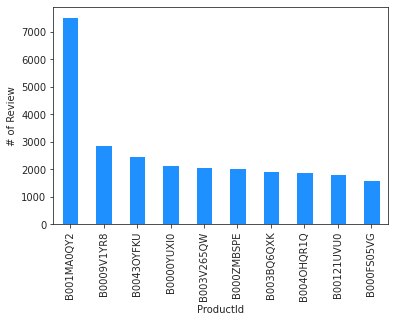

In [50]:
most_popular.head(10).plot(kind = "bar", color= 'dodgerblue', legend= False)
plt.ylabel('# of Review')
plt. show()


Î¶¨Î∑∞ ÏàòÍ∞Ä Ïñ¥Îäê Ï†ïÎèÑ Ïù¥ÏÉÅÎêòÎäî ÏÉÅÌíàÏùÑ ÎåÄÏÉÅÏúºÎ°ú ÌèâÍ∑† ÌèâÏ†êÏù¥ 4Ïù¥ÏÉÅÏù∏ Î∑∞Ìã∞ ÏÉÅÌíàÏùÑ Î¶¨ÌÑ¥ÌïòÍ≤å Ìï¥Î≥¥Ïûê. \\

-----

Î¶¨Î∑∞ ÏàòÍ∞Ä 100Í∞ú Ïù¥ÏÉÅÏù∏ ÏÉÅÌíàÏùÑ ÎåÄÏÉÅÏúºÎ°ú, ÌèâÍ∑† ÌèâÏ†êÏù¥ 4 Ïù¥ÏÉÅÏù∏ Ï†úÌíàÎì§ÏùÄ 

In [53]:
nReview_thr= 100
Rate_thr= 4

def Rec_popular(nRec, nReview_thr, Rate_thr):
  AMZ_cos= pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].mean()) # ProductId Ïóê Îî∞Î•∏ RatingÏùò ÌèâÍ∑†Í∞í groupby     
  AMZ_cos.rename(columns={'Rating':'Mean_Rate'}, inplace=True) # column name 'Rating' -> 'Mean_Rate'

  AMZ_cos['Nreview']=popular_products # Ï†úÌíàÎ™ÖÏóê Îî∞Î•∏ Î¶¨Î∑∞ Í∞ØÏàò Ïó¥ Ï∂îÍ∞Ä ('Nreview')
  AMZ_cos= AMZ_cos.sort_values('Nreview', ascending=False) # Ï†úÌíàÏùò Î¶¨Î∑∞Í∞Ä ÎßéÏùÄ ÏàúÏúºÎ°ú Ïû¨Ï†ïÎ†¨

  Top_cos= AMZ_cos[(AMZ_cos['Nreview'] >= nReview_thr) & (AMZ_cos['Mean_Rate'] >= Rate_thr)] # Î¶¨Î∑∞ 100Í∞ú Ïù¥ÏÉÅ, ÌèâÍ∑† ÌèâÏ†ê 4 Ïù¥ÏÉÅ Ï∂îÏ∂ú

  Top_cos.sort_values('Mean_Rate', ascending=False)
  
  recommendU= list(Top_cos.head(nRec).index)

  print("The Top %i cosmetics on Amazon now ! \n"%nRec, recommendU)

Rec_popular(10, nReview_thr, Rate_thr)

The Top 10 cosmetics on Amazon now ! 
 ['B001MA0QY2', 'B0043OYFKU', 'B0000YUXI0', 'B003V265QW', 'B000ZMBSPE', 'B003BQ6QXK', 'B004OHQR1Q', 'B00121UVU0', 'B000FS05VG', 'B000142FVW']


------
### **2. Î™®Îç∏ Í∏∞Î∞ò Ï∂îÏ≤ú ÏãúÏä§ÌÖú**

Ïú†Ï†ÄÏùò ÌèâÏ†êÏùÑ ÏòàÏ∏°ÌïòÏó¨ ÌèâÏ†êÏùÑ Ï§Ä Ï†Å ÏóÜÎäî (Ï†ïÎ≥¥Í∞Ä ÏóÜÎäî) Ïú†Ï†ÄÏóêÍ≤åÎèÑ ÏïÑÏù¥ÌÖúÏùÑ Ï∂îÏ≤úÌï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäîÍ≤ÉÏù¥ Î™©Ìëú!



#### **2-1. Î™®Îç∏ ÎßåÎì§Í∏∞ : SVD based!**

##### **i) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**
Ìö®Ïú®Ï†ÅÏù∏ Ï∂îÏ≤ú ÏãúÏä§ÌÖú Íµ¨Ï∂ïÏùÑ ÏúÑÌïòÏó¨ ÌèâÏ†êÏùÑ 10Í∞ú ÎØ∏ÎßåÏúºÎ°ú Î∞õÏùÄ itemÏùÄ Ï†úÏô∏ÌïòÍ≥† Ï∂îÏ≤úÌïúÎã§. 

In [13]:
mProd_ratings = 10
filtered_items = amazon_ratings['ProductId'].value_counts() >= mProd_ratings
filtered_items = filtered_items[filtered_items].index.tolist()


amzRate_filtered = amazon_ratings[amazon_ratings['ProductId'].isin(filtered_items)]
print('The original data frame shape:\t{}'.format(amazon_ratings.shape))
print('The new data frame shape:\t{}'.format(amzRate_filtered.shape))

The original data frame shape:	(2023070, 4)
The new data frame shape:	(1514617, 4)


ÏïΩ 51Îßå Í∞ú Ï†ïÎèÑÏùò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÏù¥ ÏßÄÏõåÏ°åÎã§.



##### **ii) Surprise SVD**
- SurpriseÏùò ÎèôÏûë progress:  
  1. Í∞ùÏ≤¥ ÏÉùÏÑ±:  `SVD()`
  2. ÌïôÏäµ: `.fit(<train set>)`
  3. ÏòàÏ∏°: 
    - Ï†ÑÏ≤¥ test set ÏòàÏ∏°: `.test(<test set>)` 
    - Îã®Ïùº sample ÏòàÏ∏°: `.predict(<User Id>, <Item Id>` 


- Î∞òÎìúÏãú ÏÇ¨Ïö©Ïûê¬†ÏïÑÏù¥Îîî,¬†ÏïÑÏù¥ÌÖú¬†ÏïÑÏù¥Îîî,¬†ÌèâÏ†ê¬†Îç∞Ïù¥ÌÑ∞ ÏàúÏúºÎ°ú ÎêòÏñ¥ÏûàÏúºÎ©∞, header ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÎßå¬†Ï†ÅÏö© Í∞ÄÎä•! 
  - "surprise" Ìè¨Î©ßÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨ Ïàò ÏûàÎèÑÎ°ù Ìï¥ÏïºÌï®
  - csv -> surprise Ìï† Í≤ΩÏö∞, Ìè¨Î©ßÏùÑ ÏßÄÏ†ïÌï¥Ï£ºÏñ¥Ïïº Ìï® (`Reader`Ïù¥Ïö©)
- `surprise.model_selection`Ïùò `GridSearchCV` : ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Í∑∏Î¶¨Îìú ÏÑúÏπòÌïòÏó¨ ÏµúÏ†Å hyper parameter Ï∞æÏïÑÏ£ºÍ≥†, ÍµêÏ∞® Í≤ÄÏ¶ù Ìï¥Ï§å.

- Hyper-parameter:
  - `n_factors`: Ï∂ïÏÜå Ï∞®Ïõê Ïàò ( ‚àë Ïùò dimension)
  - `n_epochs`: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÖã ÌõàÎ†® ÌöüÏàò
  - `lr_all`: learning rate


refs)
- https://big-dream-world.tistory.com/70
- https://techblog-history-younghunjo1.tistory.com/117


###### **ii)-1. ÌïÑÏöîÌïú Î©îÏÑúÎìú import**

In [14]:
%pip install surprise
import surprise
from surprise import Dataset, dataset, Reader
from surprise.model_selection import GridSearchCV, cross_validate,train_test_split
from surprise import accuracy

import heapq

from collections import defaultdict
from operator import itemgetter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11.8 MB 3.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633958 sha256=a69ec4ee015d020a6371cc3310ec3421a88523f27b8568ad0c78035d4ebfb766
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


###### **ii)-2. Surprise Dataframe ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò**


In [15]:
# """Pandas Dataframe 2 Surprise Dataframe"""

class Pd2Sur(dataset.DatasetAutoFolds):
    def __init__(self, df, reader):
        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['UserId'], df['ProductId'], df['Rating'])]
        self.reader=reader


reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines= 1)
data = Pd2Sur(amzRate_filtered, reader) # ÌèâÏ†êÏù¥ 10Í∞ú Ïù¥ÌïòÏù∏ itemsÎ•º Ï†úÏô∏ & ÌèâÏ†êÍ∏∞Î°ù ÏûàÎäî ÏÉòÌîåÎì§ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò¥!


###### **ii)-3. ÏµúÏ†ÅÏùò Hyper-params / Algorithm ÌÉêÏÉâ**

- ÏµúÏ†Å hyperparameter ? `GridSearchCV()`

In [16]:
# #@title
# # """ÏµúÏ†ÅÍ∞í ÌÉêÏÉâ (GridSearchCV) & k-fold Validation"""
# param_grid = {                # ÌÉêÏÉâÌï† ÏµúÏ†Åhyper-parameter ÏÇ¨Ï†Ñ ÏßÄÏ†ï 
#     'n_epochs': [20,30],
#     'lr_all': [0.005, 0.010],
#     'n_factors' : [50,100]
# }
# gs= GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
# gs.fit(data)

# # RMSE
# print("Best RMSE score attained: ", gs.best_score['rmse'])
# print("Best RMSE params: ", gs.best_params['rmse'])

# # MAE
# print("Best RAE score attained: ", gs.best_score['mae'])
# print("Best RAE params: ", gs.best_params['mae'])

# # Best RMSE score attained:  1.2507946607501712
# # Best RMSE params:  {'n_epochs': 20, 'lr_all': 0.005, 'n_factors': 50}
# # Best RAE score attained:  0.96847657418555
# # Best RAE params:  {'n_epochs': 50, 'lr_all': 0.01, 'n_factors': 50}

# #@title
# svd= gs.best_estimator['rmse']
# trn= data.build_full_trainset() # Î™®Îì† Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÏùÑ train setÏúºÎ°ú!
# svd.fit(trn)



--> ÎÑàÎ¨¥!! Ïò§ÎûòÍ±∏Î¶º„Ö† 

- ÏµúÏ†ÅÏùò SVD Í∏∞Î∞ò ÏïåÍ≥†Î¶¨Ï¶ò ÌÉêÏÉâ
  : **SVD, SVDpp, NormalPredictor, BaselineOnly**

In [17]:
# from surprise import SVD, SVDpp, NormalPredictor, BaselineOnly

# algos = []
# # Î™®Îì† ÏïåÍ≥†Î¶¨Ï¶òÏùÑ literateÌôî ÏãúÏºúÏÑú Î∞òÎ≥µÎ¨∏ÏùÑ Ïã§ÌñâÏãúÌÇ®Îã§.
# for algorithm in [SVD(), SVDpp(), NormalPredictor(),BaselineOnly()]:
    
#     # ÍµêÏ∞®Í≤ÄÏ¶ù
#     results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
#     # Í≤∞Í≥º Ï†ÄÏû•Í≥º ÏïåÍ≥†Î¶¨Ï¶ò Ïù¥Î¶Ñ Ï∂îÍ∞Ä
#     tmp = pd.DataFrame.from_dict(results).mean(axis=0)
#     tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
#     algos.append(tmp)
    
# pd.DataFrame(algos).set_index('Algorithm').sort_values('test_rmse')    
  

# Estimating biases using als...
# Estimating biases using als...
# Estimating biases using als...
# test_rmse	fit_time	test_time
# Algorithm			
# BaselineOnly	1.251366	13.151686	5.769353
# SVD	1.252803	91.789061	9.232320
# SVDpp	1.259822	168.864259	15.021568
# NormalPredictor	1.671706	3.090116	8.251137
# runtime: 2h 20m 18s

-> Baseline Í≥†Î†§Ìïú ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Í∞ÄÏû• ÏÑ±Îä• 

Í¥úÏ∞ÆÏúºÎØÄÎ°ú, **BaselineOnly** Ï±ÑÌÉù!

###### **ii)-4. Train-Test set**


In [18]:
from surprise.model_selection import train_test_split
trn, tst = train_test_split(data, test_size=.3)


###### **ii)-5. BaselineOnly ÌïôÏäµ & ÌîºÌåÖ**


In [19]:
from surprise import BaselineOnly

bsl_options = {
    "method": "sgd",
    "n_epochs": 20,
    "learning_rate": 0.005
}
BLO = BaselineOnly(bsl_options=bsl_options)
BLO.fit(trn)

pred=[]
pred= BLO.test(tst)

Estimating biases using sgd...


In [20]:
print("RMSE: ",accuracy.rmse(pred))
print("MAE: ", accuracy.mae(pred))

RMSE: 1.2342
RMSE:  1.2342336960291918
MAE:  0.9625
MAE:  0.9624716892930252


ÏòàÏ∏°Í∞íÏùÑ Îã§Î£®Í∏∞ ÏâΩÍ≤å pandas DataFrame ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

In [21]:
results_list=[]

for result in pred:
  results_list.append([result.uid, result.iid, result.r_ui, result.est])
  

results= pd.DataFrame(results_list,columns= ['UserId','ProductId','Rating','Pred_bl'])
results.head(10)

UserId   ProductId  Rating   Pred_bl
0  A2EYVGXW1H3ZFR  B005WWBGPO     5.0  4.296536
1  A1WLDL2OWMTC18  B000SWY02O     5.0  4.380759
2  A2CHH5P055A0KL  B0030HKJ8I     5.0  4.519408
3  A3AERJ7NNSM3OC  B005KO7NK6     5.0  3.933202
4  A29EFNCFEELB6S  B00772AKMM     5.0  4.846733
5  A3CYZDGVELZZ8T  B001JDHR4Y     5.0  4.337216
6  A3K6OJS5JIZ1AW  B0012RYDWG     5.0  4.370013
7  A3LH77PBDFEO3F  B00067YSLO     5.0  4.265435
8  A1BA21XNJIB87I  B00AM8923G     5.0  3.521402
9  A2PDIW4392JBT0  B00BOH1PQQ     5.0  3.633190

Train, Test set ÏïÑÎãàÏóàÎçò Í∞í ÎÑ£Ïñ¥ÏÑú prediction Ìï¥Î≥¥Í∏∞ 

In [22]:
real_mat= results.head(10000).pivot_table(values='Rating', index='UserId', columns='ProductId')
real_mat.head()

ProductId              535795531X  7806397051  9790778872  9790786875  \
UserId                                                                  
A0018632VUVKRGSYBEAT          NaN         NaN         NaN         NaN   
A02238611KADHRFBPKAUK         NaN         NaN         NaN         NaN   
A03197302XWG2A14N14YQ         NaN         NaN         NaN         NaN   
A0459829SI5B5WIOZZHX          NaN         NaN         NaN         NaN   
A059303511MRU8YSIIYJ1         NaN         NaN         NaN         NaN   

ProductId              9790789939  9790790961  B00004TUBL  B00004TUBV  \
UserId                                                                  
A0018632VUVKRGSYBEAT          NaN         NaN         NaN         NaN   
A02238611KADHRFBPKAUK         NaN         NaN         NaN         NaN   
A03197302XWG2A14N14YQ         NaN         NaN         NaN         NaN   
A0459829SI5B5WIOZZHX          NaN         NaN         NaN         NaN   
A059303511MRU8YSIIYJ1         NaN         NaN         NaN         NaN   

ProductId              B00004U9V2  B000050B6U  ...  B00KCTER3U  B00KD73PBQ  \
UserId                                         ...                           
A0018632VUVKRGSYBEAT          NaN         NaN  ...         NaN         NaN   
A02238611KADHRFBPKAUK         NaN         NaN  ...         NaN         NaN   
A03197302XWG2A14N14YQ         NaN         NaN  ...         NaN         NaN   
A0459829SI5B5WIOZZHX          NaN         NaN  ...         NaN         NaN   
A059303511MRU8YSIIYJ1         NaN         NaN  ...         NaN         NaN   

ProductId              B00KGDRCZW  B00KH6F6TM  B00KNIL36E  B00KQBR9FM  \
UserId                                                                  
A0018632VUVKRGSYBEAT          NaN         NaN         NaN         NaN   
A02238611KADHRFBPKAUK         NaN         NaN         NaN         NaN   
A03197302XWG2A14N14YQ         NaN         NaN         NaN         NaN   
A0459829SI5B5WIOZZHX          NaN         NaN         NaN         NaN   
A059303511MRU8YSIIYJ1         NaN         NaN         NaN         NaN   

ProductId              B00KQWBJ5W  B00KTLBEEQ  B00KTP8Q1G  B00L5JHZJO  
UserId                                                                 
A0018632VUVKRGSYBEAT          NaN         NaN         NaN         NaN  
A02238611KADHRFBPKAUK         NaN         NaN         NaN         NaN  
A03197302XWG2A14N14YQ         NaN         NaN         NaN         NaN  
A0459829SI5B5WIOZZHX          NaN         NaN         NaN         NaN  
A059303511MRU8YSIIYJ1         NaN         NaN         NaN         NaN  

[5 rows x 7056 columns]

###### **ii)-6 Performance**


In [23]:
BLO.predict("A004511036AHSSV5O4SBY","9788071198")

Prediction(uid='A004511036AHSSV5O4SBY', iid='9788071198', r_ui=None, est=3.9683410311151626, details={'was_impossible': False})

In [24]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2= round(metrics.r2_score(y_true, y_pred)*100,3)
    
    corr= round(np.corrcoef(y_true, y_pred)[0,1],3)
    mape= round(
        metrics.mean_absolute_percentage_error(y_true, y_pred)*100,3)
    rmse= round(metrics.mean_squared_error(y_true, y_pred, squared=False),3)
    
    df= pd.DataFrame({"R2":r2,
                     "Corr": corr,
                     "RMSE": rmse,
                     "MAPE":mape},
                    index=[0])
    return df

scoring(results.Rating, results.Pred_bl)

R2   Corr   RMSE    MAPE
0  10.628  0.326  1.234  44.014

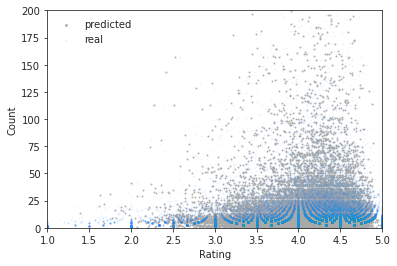

In [54]:
product_rating_predbl = results.groupby('ProductId')['Pred_bl'].mean()
product_rating_count_predbl = results.groupby('ProductId')['Pred_bl'].count()
product_rating_count_predbl= product_rating_count_predbl[product_rating_count_predbl > 0]
unreliability_predbl = results.groupby('ProductId')['Pred_bl'].std(ddof = -1)
unique_products_list_predbl = results.ProductId.unique()

data_model_predbl = pd.DataFrame({'Rating': product_rating_predbl[unique_products_list_predbl],\
                                 'Count': product_rating_count_predbl[unique_products_list_predbl], \
                                 'Unreliability': unreliability_predbl[unique_products_list_predbl]})


product_rating = results.groupby('ProductId')['Rating'].mean()
product_rating_count = results.groupby('ProductId')['Rating'].count()
product_rating_count= product_rating_count[product_rating_count > 0]
unreliability = results.groupby('ProductId')['Rating'].std(ddof = -1)
unique_products_list = results.ProductId.unique()

data_model = pd.DataFrame({'Rating': product_rating[unique_products_list],
                          'Count': product_rating_count[unique_products_list], 
                          'Unreliability': unreliability[unique_products_list]})



plt.figure(figsize=(6,4))

plt.scatter(data_model_predbl.Rating, data_model_predbl.Count, c='darkgrey', s=1, alpha= 0.8)
plt.scatter(data_model.Rating, data_model.Count, c='dodgerblue', s=1, alpha= 0.05)


plt.xlabel('Rating')
plt.ylabel('Count')
plt.ylim([0,200])
plt.xlim([1,5])
plt.legend(['predicted', 'real'],markerscale=2, frameon= False)

plt.show()


------------
#### **2-2. Comparison with an Open Source Algorithm from kaggle**



https://www.kaggle.com/code/swaroopnath6/recommender-system?scriptVersionId=32138732&cellId=55

<br><br>
<span style="color:grey"> Observation - The root mean square in predictions drastically reduce with the hypothesis we assumed.  
<br><br>


The predictions are also done in a very impressive time - ~2 minutes for ~30000 user ids

<br><br>

Using the rating that is devoid of baseline rating does seem to give better results than the plain simple system. There are a very important deduction from these experimental results -
<br><br>

It is better to predict the overhead rating (by ignoring the baseline rating), and then add the baseline rating.   

This means that hypothesis:  
"People ** usually tend to rate some product at a baseline level (3 here) unless the product experience with the user is very bad**" is a better start off point for a Recommender system.

<br><br>

The second perspective is definitely better in producing results. But how can it be improved? Can there be a third segment in the rating? Yes, definitely!

Intuition - Have you experienced yourself rating drivers of a particular application (Uber, in my case) more generously/harshly day by day?  
This is the third aspect in rating - a general user experience with the application.   
In the context of movies, you can imagine this as you being a harsher critic day by day. This kind of interaction (user - service) can be modelled using the timestamp provided. We will look at such interactions closely in later part of this notebook.

In general -  

ùëÖùëéùë°ùëñùëõùëî=ùêµùëéùë†ùëíùëôùëñùëõùëíùëÖùëéùë°ùëñùëõùëî +  ùëàùë†ùëíùëüùëÜùëíùëüùë£ùëñùëêùëíùêºùëõùë°ùëíùëüùëéùëêùë°ùëñùëúùëõùëÖùëéùë°ùëñùëõùëî +  ùëàùë†ùëíùëüùëÉùëüùëúùëëùë¢ùëêùë°ùêºùëõùë°ùëíùëüùëéùëêùë°ùëñùëúùëõùëÖùëéùë°ùëñùëõùëî 

</span>

In [26]:
from tqdm import tqdm
class ModelRecommender:
    def __init__(self, strategy = 'SVD', latent_factors = 5, num_epochs = 10, reg_param = 0.01):
        self.strategy = strategy
        self.latent_factors = latent_factors = 5
        self.num_epochs = 10
        self.reg_param = reg_param
        self.learning_rate = 0.0005
        
    def fit(self, matrix):
        m, n = matrix.shape
        self.P = pd.DataFrame(np.random.rand(m, self.latent_factors), index = matrix.index) # Users
        self.Q = pd.DataFrame(np.random.rand(n, self.latent_factors), index = matrix.columns) # Products
        
        users = list(matrix.index)
        products = list(matrix.columns)

        for epoch in tqdm(range(self.num_epochs), desc = 'Epoch'):
            for user, product in zip(users, products):
                error = matrix.loc[user, product] - self.predictions(self.P.loc[user].values, self.Q.loc[product].values)
                self.P.loc[user] += self.learning_rate * (error * self.Q.loc[product].values - self.reg_param * self.P.loc[user].values)
                self.Q.loc[product] += self.learning_rate * (error * self.P.loc[user].values - self.reg_param * self.Q.loc[product].values)
                
    def predictions(self, P, Q):
        return np.dot(P, Q.T)
    
    def predict(self, X_test):
        y_pred = pd.Series(index = X_test.index)
        
        for index, row in X_test.iterrows():
            user_id = row['UserId']
            product_id = row['ProductId']
            if user_id not in self.P.index:
                y_pred.loc[index] = 0
                continue
            if product_id not in self.Q.index:
                y_pred.loc[index] = 0
                continue
            pred = self.predictions(self.P.loc[user_id].values, self.Q.loc[product_id].values)
            y_pred.loc[index] = pred
        
        return y_pred.values
    
    def recommend(self, user_id, num_recommendations = 10):
        recommendations = pd.DataFrame(columns = ['ProductId', 'Recommendability'])
        
        for product_id in self.Q.index:
            recommendability = self.predictions(self.P.loc[user_id].values, self.Q.loc[product_id].values)
            recommendations = recommendations.append({'ProductId': product_id, 'Recommendability': recommendability}, ignore_index = True)
            
        recommendations.sort_values(by = 'Recommendability', ascending = False, inplace = True)
        
        max_recommendations = min(num_recommendations, self.Q.shape[0])
        return recommendations #.iloc[:max_recommendations, 0]
        

In [27]:
amazon_ratings1 = amzRate_filtered.head(10000)
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId              1304351475  1403790965  3227001381  535795531X  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A00473363TJ8YSZ3YAGG9           0           0           0           0   
A03056581JJIOL5FSKJY7           0           0           0           0   
A03099101ZRK4K607JVHH           0           0           0           0   
A0505229A7NSH3FRXRR4            0           0           0           0   

ProductId              5357955948  602260074X  7535842801  7806397051  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           5   
A00473363TJ8YSZ3YAGG9           0           0           0           0   
A03056581JJIOL5FSKJY7           0           0           0           0   
A03099101ZRK4K607JVHH           0           0           0           0   
A0505229A7NSH3FRXRR4            0           0           0           0   

ProductId              7899123011  8096399322  ...  B000052ZSS  B000052ZTY  \
UserId                                         ...                           
A00205921JHJK5X9LNP42           0           0  ...           0           0   
A00473363TJ8YSZ3YAGG9           0           0  ...           0           0   
A03056581JJIOL5FSKJY7           0           0  ...           0           0   
A03099101ZRK4K607JVHH           0           0  ...           0           0   
A0505229A7NSH3FRXRR4            0           0  ...           0           0   

ProductId              B00005302B  B00005302X  B00005303P  B00005304H  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A00473363TJ8YSZ3YAGG9           0           0           0           0   
A03056581JJIOL5FSKJY7           0           0           0           0   
A03099101ZRK4K607JVHH           0           0           0           0   
A0505229A7NSH3FRXRR4            0           0           0           0   

ProductId              B00005304L  B000053056  B000053071  B0000530ED  
UserId                                                                 
A00205921JHJK5X9LNP42           0           0           0           0  
A00473363TJ8YSZ3YAGG9           0           0           0           0  
A03056581JJIOL5FSKJY7           0           0           0           0  
A03099101ZRK4K607JVHH           0           0           0           0  
A0505229A7NSH3FRXRR4            0           0           0           0  

[5 rows x 183 columns]

In [28]:
recommender= ModelRecommender() # Í∞ùÏ≤¥ ÏÉùÏÑ±
recommender.fit(ratings_utility_matrix) # SVD fitting (ÌïôÏäµ)

Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  4.08it/s]


In [29]:
data = amzRate_filtered.iloc[:, :-1] # ÌïôÏäµÌïòÍ∏∞ Ï¢ãÏùÄ ÌòïÌÉúÏùò dataframe ÏÉùÏÑ± =data
data.head()


UserId   ProductId  Rating
26  A1RXI3A1E99112  1304351475     5.0
27  A26QL1FBQO9C0E  1304351475     5.0
28  A19KEEVZYO1KO6  1304351475     4.0
29  A1F6HRR58TQ2R0  1304351475     5.0
30   AVQP6PO1NK0IJ  1304351475     1.0

In [30]:
from sklearn.model_selection import train_test_split # data train(trn) - test(tst)8:2Î°ú Î∂ÑÌï† 
from sklearn.metrics import mean_squared_error
trn, tst, _, _ = train_test_split(data, np.zeros(data.shape[0]), test_size = 0.2)
tstX = tst.iloc[:, :-1] # test setÏùò feature (X) ÏôÄ ÏòàÏ∏° ÌÉÄÍ≤ü (Y) ÎÇòÎà†Ï§å 
tstY = tst.iloc[:, -1]  


predY = recommender.predict(tstX) # ÌïôÏäµ Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú tst setÏùò feature ÎÑ£Ïñ¥ tstY ÏòàÏ∏° (==predY)
rmse = np.sqrt(mean_squared_error(tstY, predY)) # ÏòàÏ∏°Í∞í predYÏôÄ Ïã§Ï†ú Í∞í tstY rmse 

print('RMSE using normal rating method: {}'.format(rmse))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


RMSE using normal rating method: 4.343167603396641


**!**
ÏÇ¨ÎûåÎì§ÏùÄ ÏïÑÎ¨¥Î¶¨ Î¨ºÌíàÏù¥ ÎÇòÎπ†ÎèÑ Ï§ëÍ∞ÑÏ†êÏàòÎäî Ï£ºÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå.  
Ïõê developerÎäî Í∑∏ÎÉ• rating median Ïù∏ 3ÏùÑ Í∏∞Î≥∏Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌïòÏòÄÏúºÎÇò,
Ïó¨Í∏∞ÏÑúÎäî Î∂ÑÌè¨Ïùò -2$\sigma$Í∞íÏù∏ 2Î•º Ïù¥Ïö©Ìï¥Î≥¥Í≤†Ïùå. 

In [31]:
recommender_BL = ModelRecommender()
recommender_BL.fit(ratings_utility_matrix)

Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.91it/s]


In [32]:
# ÏùºÎã® ÏõêÎûò ÏΩîÎìú 
predY_BL = recommender_BL.predict(tstX)
predY_BL += 3
rmse_BL= np.sqrt(mean_squared_error(tstY, predY_BL))

print('RMSE using baseline rating method: {}'.format(rmse_BL))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


RMSE using baseline rating method: 1.7357381189349892


In [33]:
result= tst
result['pred']= predY
result['pred_bl']= predY_BL

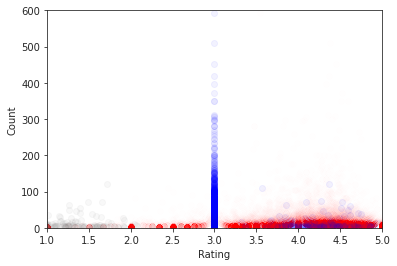

In [34]:
# Rating versus count
product_rating_pred = result.groupby('ProductId')['pred'].mean()
product_rating_count_pred = result.groupby('ProductId')['pred'].count()
unreliability_pred = result.groupby('ProductId')['pred'].std(ddof = -1)
unique_products_list_pred = result.ProductId.unique()

data_model_pred = pd.DataFrame({'Rating': product_rating_pred[unique_products_list_pred],
                               'Count': product_rating_count_pred[unique_products_list_pred], 
                                'Unreliability': unreliability_pred[unique_products_list_pred]})


product_rating_predbl = result.groupby('ProductId')['pred_bl'].mean()
product_rating_count_predbl = result.groupby('ProductId')['pred_bl'].count()
unreliability_predbl = result.groupby('ProductId')['pred_bl'].std(ddof = -1)
unique_products_list_predbl = result.ProductId.unique()

data_model_predbl = pd.DataFrame({'Rating': product_rating_predbl[unique_products_list_predbl],\
                                 'Count': product_rating_count_predbl[unique_products_list_predbl], \
                                 'Unreliability': unreliability_predbl[unique_products_list_predbl]})


product_rating = result.groupby('ProductId')['Rating'].mean()
product_rating_count = result.groupby('ProductId')['Rating'].count()
unreliability = result.groupby('ProductId')['Rating'].std(ddof = -1)
unique_products_list = result.ProductId.unique()

data_model = pd.DataFrame({'Rating': product_rating[unique_products_list],
                          'Count': product_rating_count[unique_products_list], 
                          'Unreliability': unreliability[unique_products_list]})




plt.scatter(data_model.Rating, data_model.Count, c='red', alpha= 0.005)

plt.scatter(data_model_pred.Rating, data_model_pred.Count, c='grey', alpha= 0.05)

plt.scatter(data_model_predbl.Rating, data_model_predbl.Count, c='blue', alpha= 0.05)


plt.xlabel('Rating')
plt.ylabel('Count')
plt.ylim([0,600])
plt.xlim([1,5])
plt.show()

#### **2-3. Ï∂îÏ≤ú**

In [57]:
def recommend(user, data, nRecommend):
  
  products= data.ProductId.unique()
  Recommmendable=pd.DataFrame(index= products, columns=['Rate'])

  for it in products:
    pred_rate= BLO.predict(user, it, verbose=False).est
    Recommmendable.loc[it]= pred_rate

  Recommmendable.sort_values(by = 'Rate', ascending = False, inplace = True)
  Recommend4U= list(Recommmendable.index[:nRecommend])

  print( "Top-%i Recommendation for %s ! \n"%(nRecommend,user), Recommend4U)
  


recommend('A004511036AHSSV5O4SBY', amazon_ratings, 15)

Top-15 Recommendation for A004511036AHSSV5O4SBY ! 
 ['B004CNRDBU', 'B002YFN49I', 'B004AQKY2Y', 'B00K7ER6LU', 'B004AI5756', 'B0046ZHQAW', 'B001F0RBRE', 'B00474JA2Y', 'B004SQ69J8', 'B002IULDP6', 'B00GJX58PE', 'B009OWSHQE', 'B005V247N8', 'B0006B65PC', 'B004PBVHZ2']
